In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
df = pd.read_csv("./RadioactivityLab.csv")

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Time (s) Background                         75 non-null     float64
 1   Geiger Counts (counts/sample) Background    75 non-null     float64
 2   RootN (cts/5s) Background                   75 non-null     float64
 3   Background Subtracted (cts/5s) Background   75 non-null     float64
 4   Time (s) Background2                        686 non-null    float64
 5   Geiger Counts (counts/sample) Background2   686 non-null    int64  
 6   RootN (cts/5s) Background2                  686 non-null    float64
 7   Background Subtracted (cts/5s) Background2  686 non-null    float64
 8   Time (s) Barium                             144 non-null    float64
 9   Geiger Counts (counts/sample) Barium        144 non-null    float64
 10  RootN (cts/5s)

In [106]:
background = df.filter(['Time (s) Background',
                        'Geiger Counts (counts/sample) Background',
                        'RootN (cts/5s) Background',
                        'Background Subtracted (cts/5s) Background'], axis=1).dropna()
background2 = df.filter(['Time (s) Background2',
                        'Geiger Counts (counts/sample) Background2',
                        'RootN (cts/5s) Background2',
                        'Background Subtracted (cts/5s) Background2'], axis=1).dropna()
barium = df.filter(['Time (s) Barium',
                        'Geiger Counts (counts/sample) Barium',
                        'RootN (cts/5s) Barium',
                        'Background Subtracted (cts/5s) Barium'], axis=1).dropna()
radium = df.filter(['Time (s) Radium',
                        'Geiger Counts (counts/sample) Radium',
                        'RootN (cts/5s) Radium',
                        'Background Subtracted (cts/5s) Radium'], axis=1).dropna()
radsamples = df.filter(['Time (s) RadSamples',
                        'Geiger Counts (counts/sample) RadSamples',
                        'RootN (cts/5s) RadSamples',
                        'Background Subtracted (cts/5s) RadSamples'], axis=1).dropna()

background.info()
background2.info()
barium.info()
radium.info()
radsamples.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Time (s) Background                        75 non-null     float64
 1   Geiger Counts (counts/sample) Background   75 non-null     float64
 2   RootN (cts/5s) Background                  75 non-null     float64
 3   Background Subtracted (cts/5s) Background  75 non-null     float64
dtypes: float64(4)
memory usage: 2.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Time (s) Background2                        686 non-null    float64
 1   Geiger Counts (counts/sample) Background2   686 non-null    int64  
 2   RootN (cts/5s) Background

Counts =  114.0  Time =  375.0  Rate =  18.24  +/-  1.7083325203250097


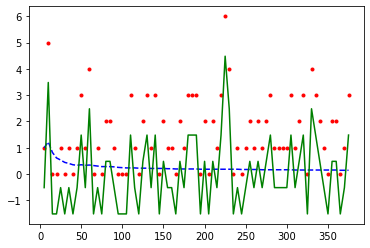

In [77]:
plt.plot(background['Time (s) Background'],background['Geiger Counts (counts/sample) Background'],'r.')
plt.plot(background['Time (s) Background'],background['RootN (cts/5s) Background'],'b--')
plt.plot(background['Time (s) Background'],background['Background Subtracted (cts/5s) Background'],'g-')

csum = 0.0
tsum = 0.0
i = 0
while i<len(background):
    csum = csum + background['Geiger Counts (counts/sample) Background'][i]
    tsum = tsum + 5.0
    #error = np.sqrt(csum)/(i+1)
    #print ('Error = ',error)
    rate = csum/tsum*60.0
    erate = np.sqrt(csum)/tsum*60.0
    i = i + 1
        
print ('Counts = ',csum,' Time = ',tsum,' Rate = ',rate,' +/- ',erate)


Counts =  1231.0  Time =  3430.0  Rate =  21.533527696793  +/-  0.6137424417323207


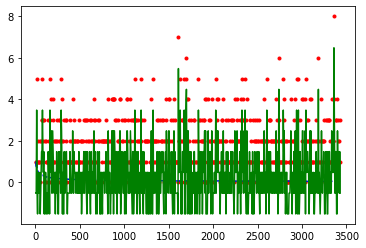

In [79]:
plt.plot(background2['Time (s) Background2'],background2['Geiger Counts (counts/sample) Background2'],'r.')
plt.plot(background2['Time (s) Background2'],background2['RootN (cts/5s) Background2'],'b--')
plt.plot(background2['Time (s) Background2'],background2['Background Subtracted (cts/5s) Background2'],'g-')


csum = 0.0
tsum = 0.0
i = 0
while i<len(background2):
    csum = csum + background2['Geiger Counts (counts/sample) Background2'][i]
    tsum = tsum + 5.0
    #error = np.sqrt(csum)/(i+1)
    #print ('Error = ',error)
    rate = csum/tsum*60.0
    erate = np.sqrt(csum)/tsum*60.0
    i = i + 1
        
print ('Counts = ',csum,' Time = ',tsum,' Rate = ',rate,' +/- ',erate)

Fit: y_intercept =  [6.13624237]
Fit: slope =  [[-0.00339809]]


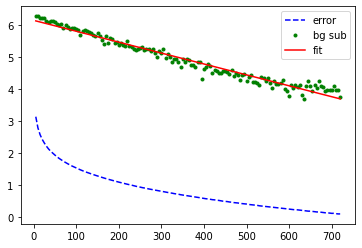

In [103]:
#plt.plot(barium['Time (s) Barium'],np.log(barium['Geiger Counts (counts/sample) Barium']),'r.',label='raw')
plt.plot(barium['Time (s) Barium'],np.log(barium['RootN (cts/5s) Barium']),'b--',label='error')
plt.plot(barium['Time (s) Barium'],np.log(barium['Background Subtracted (cts/5s) Barium']),'g.',label='bg sub')

from sklearn import linear_model

reg = linear_model.LinearRegression()

x_data = barium['Time (s) Barium'].values.reshape(-1, 1)
y_data = np.log(barium['Background Subtracted (cts/5s) Barium'].values.reshape(-1, 1))

reg.fit(x_data,y_data)

print ('Fit: y_intercept = ',reg.intercept_)
print ('Fit: slope = ',reg.coef_)

y_fit = x_data*reg.coef_ + reg.intercept_
plt.plot(x_data,y_fit,'r-',label='fit')
plt.legend()

Fit: y_intercept =  [6.25239814]
Fit: slope =  [[-0.00396822]]


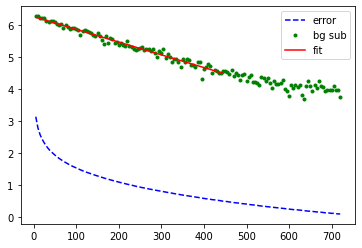

In [102]:
barium2 = barium[barium['Time (s) Barium'] < 450]

#plt.plot(barium['Time (s) Barium'],np.log(barium['Geiger Counts (counts/sample) Barium']),'r.',label='raw')
plt.plot(barium['Time (s) Barium'],np.log(barium['RootN (cts/5s) Barium']),'b--',label='error')
plt.plot(barium['Time (s) Barium'],np.log(barium['Background Subtracted (cts/5s) Barium']),'g.',label='bg sub')

from sklearn import linear_model

reg = linear_model.LinearRegression()

x_data = barium2['Time (s) Barium'].values.reshape(-1, 1)
y_data = np.log(barium2['Background Subtracted (cts/5s) Barium'].values.reshape(-1, 1))

reg.fit(x_data,y_data)

print ('Fit: y_intercept = ',reg.intercept_)
print ('Fit: slope = ',reg.coef_)

y_fit = x_data*reg.coef_ + reg.intercept_
plt.plot(x_data,y_fit,'r-',label='fit')
plt.legend()

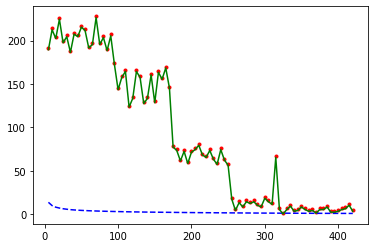

In [105]:
plt.plot(radium['Time (s) Radium'],radium['Geiger Counts (counts/sample) Radium'],'r.')
plt.plot(radium['Time (s) Radium'],radium['RootN (cts/5s) Radium'],'b--')
plt.plot(radium['Time (s) Radium'],radium['Background Subtracted (cts/5s) Radium'],'g-')

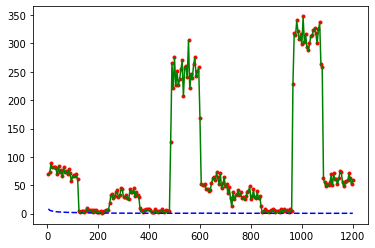

In [104]:
plt.plot(radsamples['Time (s) RadSamples'],radsamples['Geiger Counts (counts/sample) RadSamples'],'r.')
plt.plot(radsamples['Time (s) RadSamples'],radsamples['RootN (cts/5s) RadSamples'],'b--')
plt.plot(radsamples['Time (s) RadSamples'],radsamples['Background Subtracted (cts/5s) RadSamples'],'g-')